In [1]:
import numpy as np
from tqdm import tqdm
from glob import glob
from utils import data as ud
from utils import analysis as ua
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
directories = ['I=0', 'I=40', 'I=55']
paths = {}

for folder in directories:
    query = 'data/' + folder + '/*'
    paths[folder] = glob(query)    

100%|██████████| 11/11 [00:19<00:00,  2.05s/it]


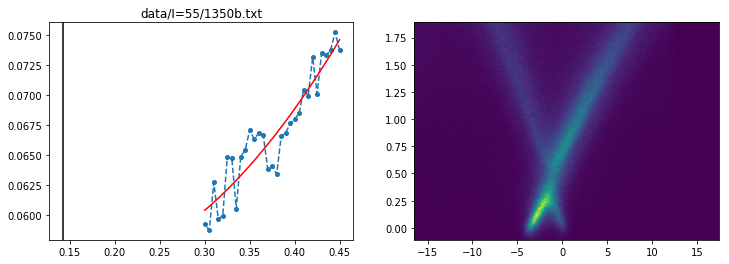

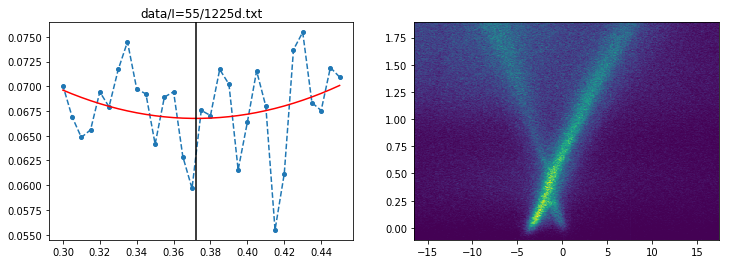

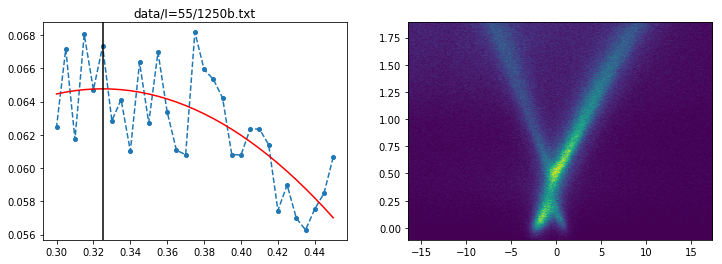

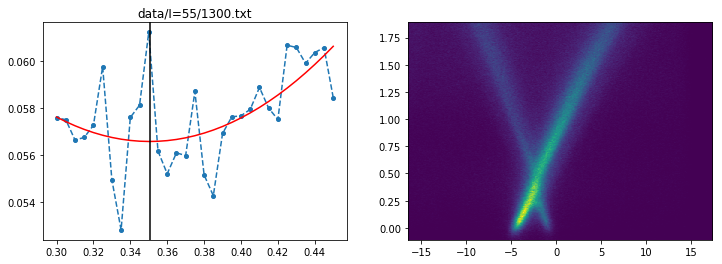

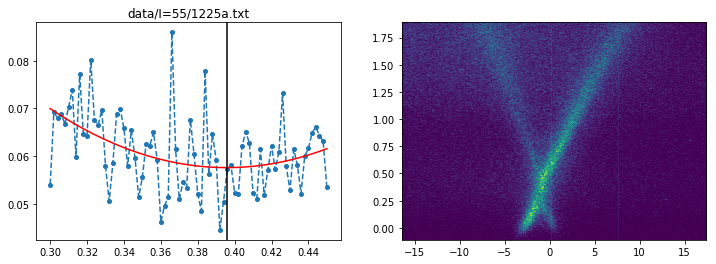

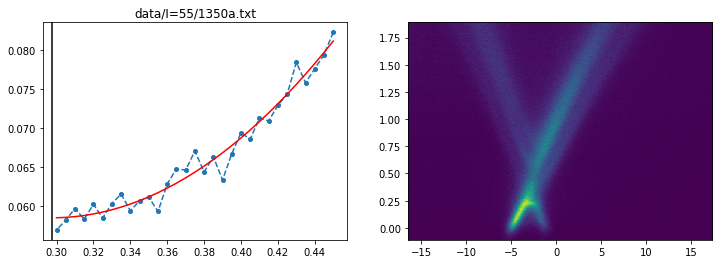

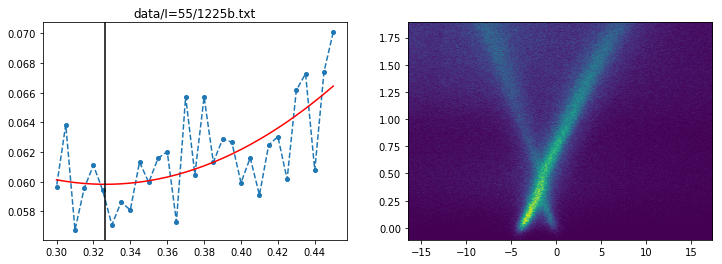

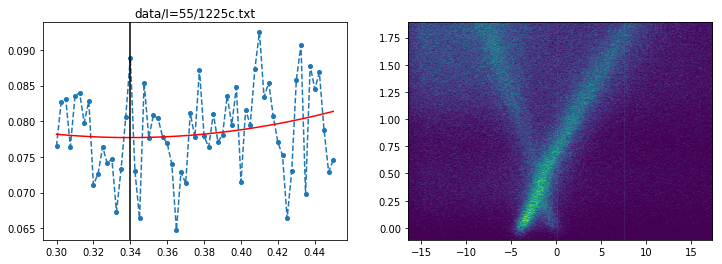

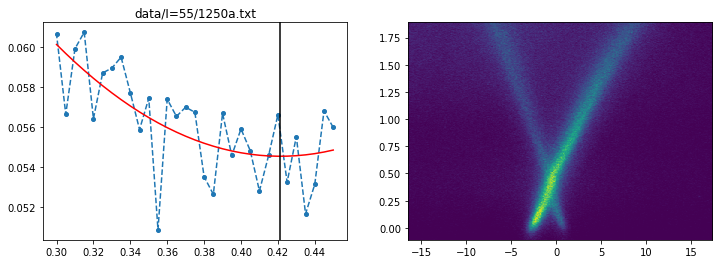

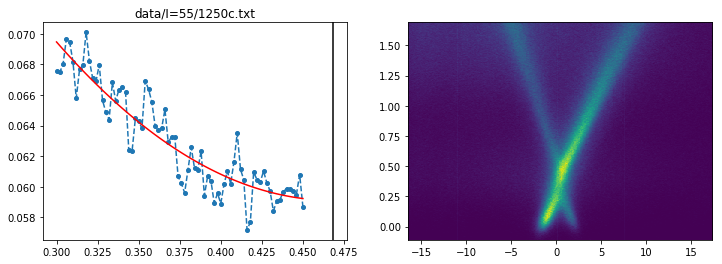

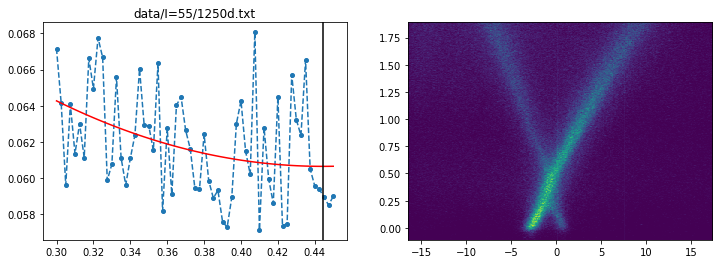

In [3]:
weights = []
for path in tqdm(paths[directories[2]]):
    # Prepare data
    arpes = ud.read_arpes(path)
    
    # Get results
    Eb_span = [0.3, 0.45]
    Eb, weight = ua.analyse_arpes(arpes, Eb_span)
    weights.append(weight)
    
    # Display
    plt.figure(figsize = [12, 4])
    plt.subplot(1, 2, 1)
    plt.title(path)
    plt.plot(Eb, weight, '--o', ms = 4)

    z = np.polyfit(Eb, weight, 2)
    p = np.poly1d(z)
    plt.plot(Eb, p(Eb), c='r')

    # -b/2a
    x_min = -z[1]/(2*z[0])
    plt.axvline(x = x_min, c = 'k')
    
    plt.subplot(1, 2, 2)
    img, extent = ud.to_show(arpes)
    plt.imshow(img, extent = extent, aspect = 'auto')
